In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import floor
#import Deep learning LIBS.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
#import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [ ]:
df=pd.read_csv("/content/pune.csv")
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [ ]:
df.drop(['society','availability'],axis=1,inplace=True)
df.nunique()

area_type           4
size               31
total_sqft       2117
bath               19
balcony             4
price            1994
site_location      97
dtype: int64

In [ ]:
bath_median=float(floor(df.bath.median()))
balcony_median=float(floor(df.balcony.median()))

In [ ]:
df.bath=df.bath.fillna(bath_median)
df.balcony=df.balcony.fillna(balcony_median)


In [ ]:
df.columns

Index(['area_type', 'size', 'total_sqft', 'bath', 'balcony', 'price',
       'site_location'],
      dtype='object')

In [ ]:
df.isnull().sum()

area_type         0
size             16
total_sqft        0
bath              0
balcony           0
price             0
site_location     1
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

area_type        0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

In [ ]:
def isfloat(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
df['size']=df['size'].apply(lambda x:float(x.split()[0]))
df.head()

,area_type,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,2.0,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,4.0,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,3.0,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,3.0,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,2.0,1200,2.0,1.0,51.00,Aundh Road


In [ ]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def total_sqft(x):
    t = x.split('-')
    if len(t) == 2:
        return (float(t[0])+float(t[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
# df['total_sqft'] = df['total_sqft'].apply(total_sqft)
for i in range(df.shape[0]):
    try:
        x=str(df['total_sqft'][i])
        df['total_sqft'][i] =total_sqft(x)
    except KeyError:
        continue
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,area_type,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,2.0,1056.0,2.0,1.0,39.07,Alandi Road
1,Plot Area,4.0,2600.0,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,3.0,1440.0,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,3.0,1521.0,3.0,1.0,95.00,Aundh
4,Super built-up Area,2.0,1200.0,2.0,1.0,51.00,Aundh Road


In [ ]:
df.isnull().sum()

area_type         0
size              0
total_sqft       46
bath              0
balcony           0
price             0
site_location     0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df[~df['total_sqft'].apply(lambda x: isfloat(x))]

,area_type,size,total_sqft,bath,balcony,price,site_location


In [ ]:
df.loc[30]

area_type        Super built-up  Area
size                              4.0
total_sqft                     2475.0
bath                              4.0
balcony                           0.0
price                           186.0
site_location                Gultekdi
Name: 30, dtype: object

In [ ]:
df['site_location'].nunique()

97

In [ ]:
df['site_location'] = df['site_location'].apply(lambda x: x.strip())
df.head(10)

,area_type,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,2.0,1056.0,2.0,1.0,39.07,Alandi Road
1,Plot Area,4.0,2600.0,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,3.0,1440.0,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,3.0,1521.0,3.0,1.0,95.00,Aundh
4,Super built-up Area,2.0,1200.0,2.0,1.0,51.00,Aundh Road
5,Super built-up Area,2.0,1170.0,2.0,1.0,38.00,Balaji Nagar
6,Super built-up Area,4.0,2732.0,4.0,2.0,204.00,Baner
7,Super built-up Area,4.0,3300.0,4.0,2.0,600.00,Baner road
8,Super built-up Area,3.0,1310.0,3.0,1.0,63.25,Bhandarkar Road
9,Plot Area,6.0,1020.0,6.0,2.0,370.00,Bhavani Peth


In [ ]:
loc_stats = df.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
loc_stats

site_location
Mangalwar peth          139
Khadaki                 139
Kondhwa                 139
Narayan Peth            139
Pune Railway Station    139
                       ... 
Wakadewadi              136
Narayangaon             136
Warje                   136
Nagar Road              136
other                     1
Name: site_location, Length: 97, dtype: int64

In [ ]:
loc_stats_less_than_10 = loc_stats[loc_stats<=10]

In [ ]:
df['site_location'] = df['site_location'].apply(lambda x: 'Other' if x in loc_stats_less_than_10 else x)
df.head()

,area_type,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,2.0,1056.0,2.0,1.0,39.07,Alandi Road
1,Plot Area,4.0,2600.0,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,3.0,1440.0,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,3.0,1521.0,3.0,1.0,95.00,Aundh
4,Super built-up Area,2.0,1200.0,2.0,1.0,51.00,Aundh Road


In [ ]:
# df["total_sqft"] = df["total_sqft"].apply(lambda x: is(x))
df["total_sqft"] = df["total_sqft"].astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13257 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13257 non-null  object 
 1   size           13257 non-null  float64
 2   total_sqft     13257 non-null  float64
 3   bath           13257 non-null  float64
 4   balcony        13257 non-null  float64
 5   price          13257 non-null  float64
 6   site_location  13257 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


In [ ]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head(10)

,area_type,size,total_sqft,bath,balcony,price,site_location,price_per_sqft
0,Super built-up Area,2.0,1056.0,2.0,1.0,39.07,Alandi Road,3699.810606
1,Plot Area,4.0,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4615.384615
2,Built-up Area,3.0,1440.0,2.0,3.0,62.00,Anandnagar,4305.555556
3,Super built-up Area,3.0,1521.0,3.0,1.0,95.00,Aundh,6245.890861
4,Super built-up Area,2.0,1200.0,2.0,1.0,51.00,Aundh Road,4250.000000
5,Super built-up Area,2.0,1170.0,2.0,1.0,38.00,Balaji Nagar,3247.863248
6,Super built-up Area,4.0,2732.0,4.0,2.0,204.00,Baner,7467.057101
7,Super built-up Area,4.0,3300.0,4.0,2.0,600.00,Baner road,18181.818182
8,Super built-up Area,3.0,1310.0,3.0,1.0,63.25,Bhandarkar Road,4828.244275
9,Plot Area,6.0,1020.0,6.0,2.0,370.00,Bhavani Peth,36274.509804


In [ ]:
df = df[~(df["total_sqft"]/df['size']<=300)]
df.shape

(12331, 8)

In [ ]:
df['price_per_sqft'].describe()

count     12331.000000
mean       6211.377398
std        4046.173747
min         267.829813
25%        4200.060096
50%        5268.199234
75%        6827.794562
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['area_type']=le.fit_transform(df['area_type'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def remove_outlier(df_in, col):
  for i in col:
    q1 = df_in[i].quantile(0.25)
    q3 = df_in[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[i] > fence_low) & (df_in[i] < fence_high)]
  return df_out

In [ ]:
df2 = remove_outlier(df, ['price_per_sqft'])
df2.shape

(11371, 8)

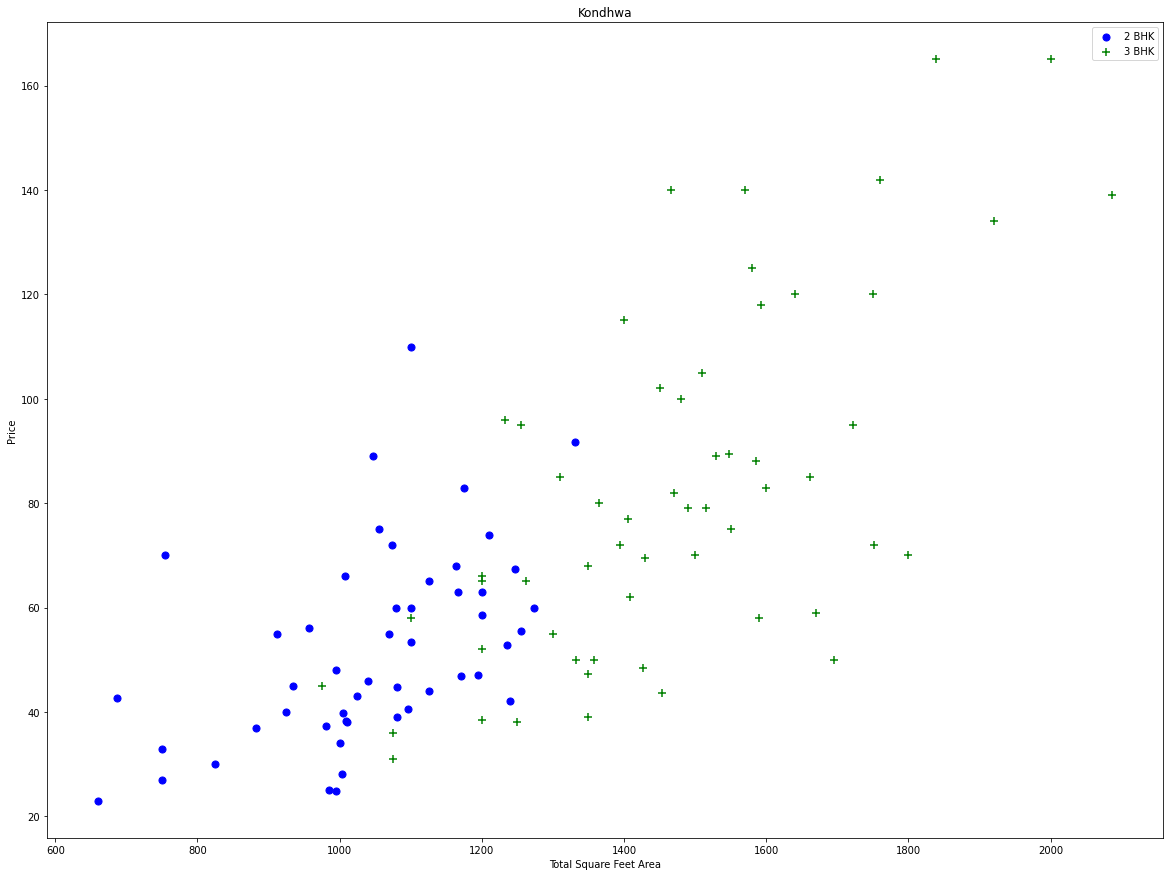

In [ ]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df['site_location']==location) & (df['size']==2)]
    bhk3 = df[(df['site_location']==location) & (df['size']==3)]
    plt.figure(figsize=(20,15))
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label='2 BHK',s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color='green', marker='+', label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df2, 'Kondhwa')

We can remove those properties for the same location, whose price of 3 BHK is less then that of 2 BHK (with same area)

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df['price_per_sqft']),
                'std' : np.std(bhk_df['price_per_sqft']),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [ ]:
df2 = remove_bhk_outliers(df2)
df2.shape

(7677, 8)

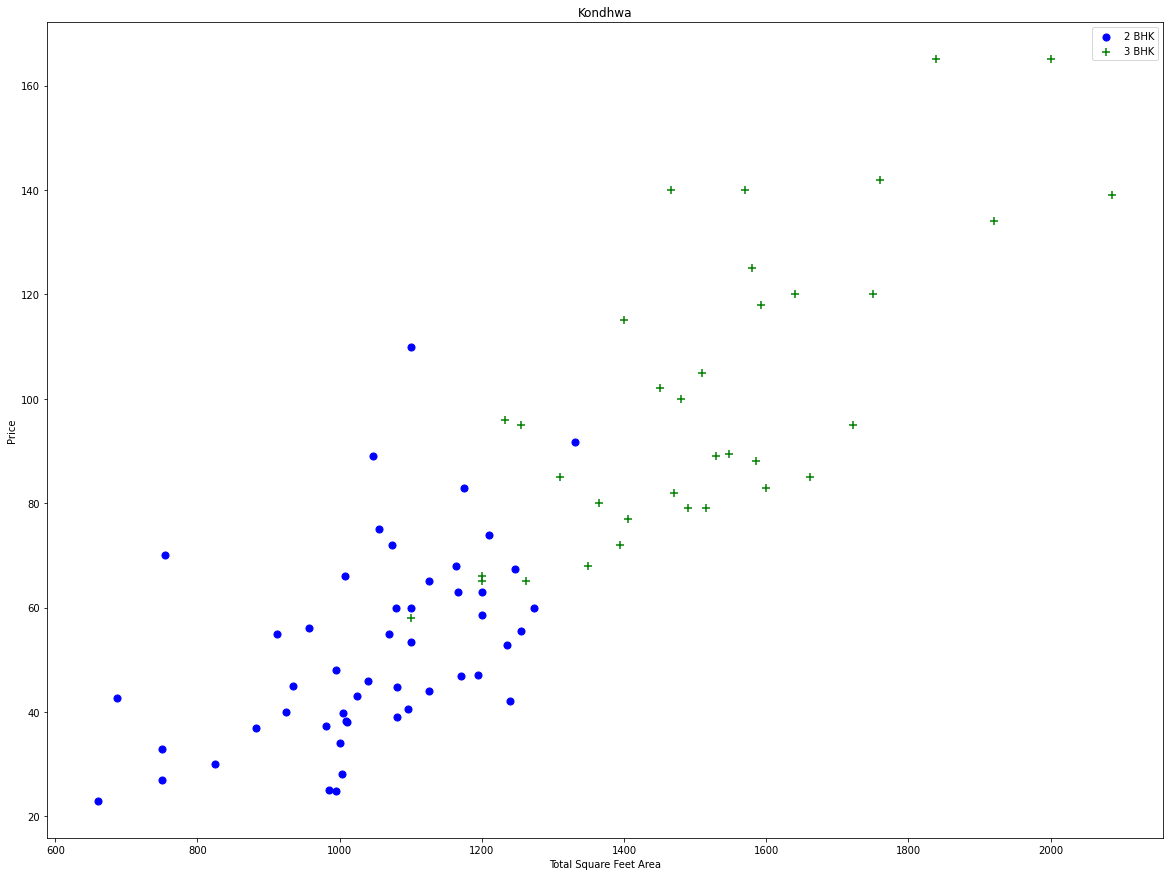

In [ ]:
plot_scatter_chart(df2, 'Kondhwa')

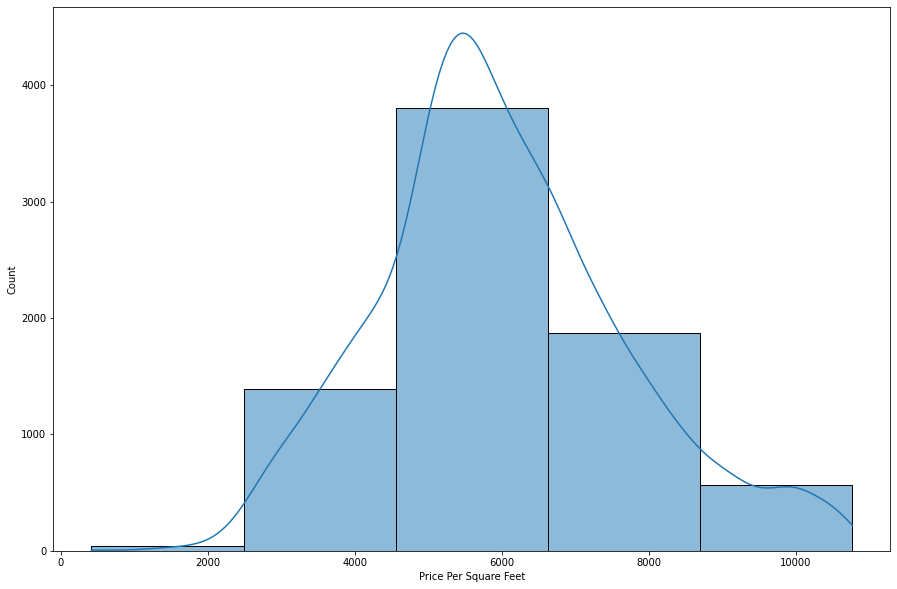

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
sns.histplot(df2['price_per_sqft'], kde=True, bins=5)

In [ ]:
df2['bath'].unique()


array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 10., 13.])

In [ ]:
df.columns

Index(['area_type', 'size', 'total_sqft', 'bath', 'balcony', 'price',
       'site_location', 'price_per_sqft'],
      dtype='object')

In [ ]:
df2[df2['bath']>10]

,area_type,size,total_sqft,bath,balcony,price,site_location,price_per_sqft
3096,3,10.0,12000.0,12.0,2.0,525.0,Fatima Nagar,4375.000000
3609,3,16.0,10000.0,16.0,2.0,550.0,Model colony,5500.000000
7979,3,11.0,6000.0,12.0,2.0,150.0,Bibvewadi,2500.000000
8636,3,10.0,4000.0,12.0,2.0,160.0,Wagholi,4000.000000
9935,3,13.0,5425.0,13.0,0.0,275.0,Kondhwa Khurd,5069.124424


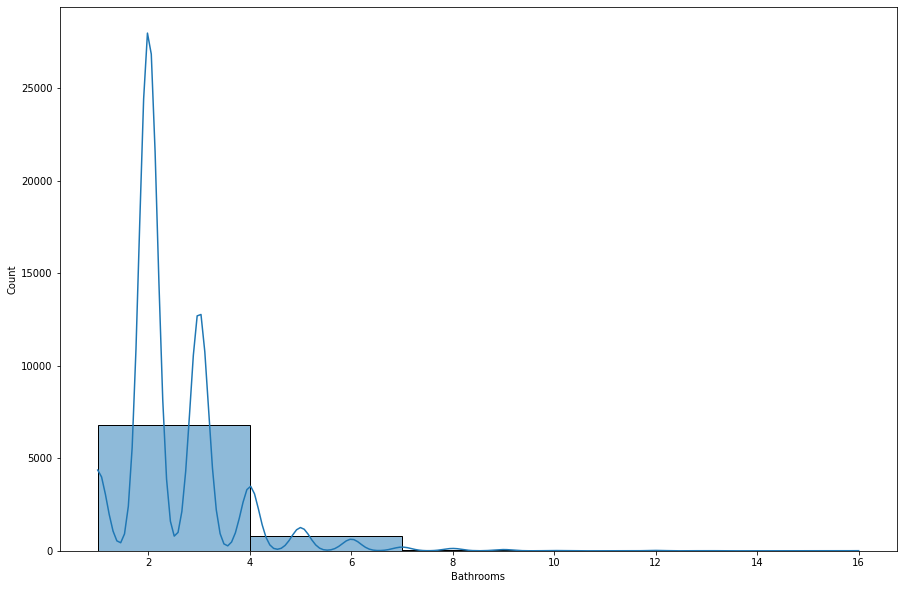

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Bathrooms')
plt.ylabel('Count')
sns.histplot(df2['bath'], kde=True, bins=5)

In [ ]:
df2 = df2[df2['bath']<df2['size']+2]
df2.shape

(7601, 8)

In [ ]:
df2.drop('price_per_sqft',axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dummies = pd.get_dummies(df2['site_location']).drop('Other', axis=1)
dummies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3 = pd.concat([df2, dummies], axis=1).drop('site_location', axis=1)
df3.head()

,area_type,size,total_sqft,bath,balcony,price,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,3,2.0,1056.0,2.0,1.0,39.07,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,1521.0,3.0,1.0,95.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,3,2.0,1170.0,2.0,1.0,38.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,4.0,2732.0,4.0,2.0,204.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2,4.0,2785.0,5.0,3.0,295.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.options.display.max_columns = None

df3.head()

,area_type,size,total_sqft,bath,balcony,price,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,Bibvewadi,Bopodi,Budhwar Peth,Bund Garden Road,Camp,Chandan Nagar,Dapodi,Deccan Gymkhana,Dehu Road,Dhankawadi,Dhayari Phata,Dhole Patil Road,Erandwane,Fatima Nagar,Fergusson College Road,Ganesh Peth,Ganeshkhind,Ghorpade Peth,Ghorpadi,Gokhale Nagar,Gultekdi,Guruwar peth,Hadapsar,Hadapsar Industrial Estate,Hingne Khurd,Jangali Maharaj Road,Kalyani Nagar,Karve Nagar,Karve Road,Kasba Peth,Katraj,Khadaki,Khadki,Kharadi,Kondhwa,Kondhwa Budruk,Kondhwa Khurd,Koregaon Park,Kothrud,Law College Road,Laxmi Road,Lulla Nagar,Mahatma Gandhi Road,Mangalwar peth,Manik Bagh,Market yard,Model colony,Mukund Nagar,Mundhawa,Nagar Road,Nana Peth,Narayan Peth,Narayangaon,Navi Peth,Padmavati,Parvati Darshan,Pashan,Paud Road,Pirangut,Prabhat Road,Pune Railway Station,Rasta Peth,Raviwar Peth,Sadashiv Peth,Sahakar Nagar,Salunke Vihar,Sasson Road,Satara Road,Senapati Bapat Road,Shaniwar Peth,Shivaji Nagar,Shukrawar Peth,Sinhagad Road,Somwar Peth,Swargate,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,3,2.0,1056.0,2.0,1.0,39.07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3.0,1521.0,3.0,1.0,95.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3,2.0,1170.0,2.0,1.0,38.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3,4.0,2732.0,4.0,2.0,204.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,2,4.0,2785.0,5.0,3.0,295.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3.shape

(7601, 102)

In [ ]:
# ['area_type','size','total_sqft','bath','balcony','price',	'Alandi Road',	'Ambegaon Budruk',	'Anandnagar',	
#  'Aundh'	,'Aundh Road',	'Balaji Nagar',	'Baner'	,'Baner road',	'Bhandarkar Road',	'Bhavani Peth'	,'Bibvewadi'	,'Bopodi',	'Budhwar Peth',	'Bund Garden Road',
#  	'Camp',	'Chandan Nagar'	,'Dapodi'	,'Deccan Gymkhana',	'Dehu Road',	'Dhankawadi'	,'Dhayari', 'Phata'	,'Dhole Patil Road',	'Erandwane'	,'Fatima Nagar',	
#  'Fergusson College Road'	,'Ganesh Peth'	,'Ganeshkhind',	'Ghorpade Peth',	'Ghorpadi'	,'Gokhale Nagar'	,'Gultekdi',	'Guruwar peth',	'Hadapsar',	'Hadapsar Industrial Estate',
#  	'Hingne Khurd',	'Jangali Maharaj Road',	'Kalyani Nagar'	,'Karve Nagar'	,'Karve Road',	'Kasba Peth',	
#  'Katraj' ,'Khadaki'	,'Khadki'	,'Kharadi'	,'Kondhwa',	'Kondhwa Budruk',	'Kondhwa Khurd',	'Koregaon Park'	,'Kothrud	Law College Road',	'Laxmi Road',	'Lulla Nagar',
#  	'Mahatma Gandhi Road',	'Mangalwar peth',	'Manik Bagh',	'Market yard',	'Model colony',	'Mukund Nagar'	,'Mundhawa	Nagar Road',	'Nana Peth'	,'Narayan Peth',
#    	'Narayangaon',	'Navi Peth',	'Padmavati',	'Parvati', 'Darshan Pashan',	'Paud Road',	'Pirangut'	,'Prabhat Road',	'Pune Railway Station'	,'Rasta Peth',	'Raviwar Peth',
#      	'Sadashiv Peth',	'Sahakar Nagar',	'Salunke Vihar',	'Sasson Road',	'Satara Road'	,'Senapati Bapat Road',	'Shaniwar Peth',	'Shivaji Nagar',	'Shukrawar Peth',
#        	'Sinhagad Road',	'Somwar Peth'	,'Swargate',	'Tilak Road',	'Uruli Devachi'	,'Vadgaon Budruk',	'Viman Nagar',	'Vishrant Wadi',	'Wadgaon Sheri'	,'Wagholi',	'Wakadewadi'	,'Wanowrie'	,'Warje',
#          	'Yerawada']



ct=make_column_transformer(
    (MinMaxScaler(),['area_type','size','total_sqft','bath','balcony',	'Alandi Road',	'Ambegaon Budruk',	'Anandnagar',	
 'Aundh'	,'Aundh Road',	'Balaji Nagar',	'Baner'	,'Baner road',	'Bhandarkar Road',	'Bhavani Peth'	,'Bibvewadi'	,'Bopodi',	'Budhwar Peth',	'Bund Garden Road',
 	'Camp',	'Chandan Nagar'	,'Dapodi'	,'Deccan Gymkhana',	'Dehu Road',	'Dhankawadi'	,'Dhayari Phata'	,'Dhole Patil Road',	'Erandwane'	,'Fatima Nagar',	
 'Fergusson College Road'	,'Ganesh Peth'	,'Ganeshkhind',	'Ghorpade Peth',	'Ghorpadi'	,'Gokhale Nagar'	,'Gultekdi',	'Guruwar peth',	'Hadapsar',	'Hadapsar Industrial Estate',
 	'Hingne Khurd',	'Jangali Maharaj Road',	'Kalyani Nagar'	,'Karve Nagar'	,'Karve Road',	'Kasba Peth',	
 'Katraj' ,'Khadaki'	,'Khadki'	,'Kharadi'	,'Kondhwa',	'Kondhwa Budruk',	'Kondhwa Khurd',	'Koregaon Park'	,'Kothrud','Law College Road',	'Laxmi Road',	'Lulla Nagar',
 	'Mahatma Gandhi Road',	'Mangalwar peth',	'Manik Bagh',	'Market yard',	'Model colony',	'Mukund Nagar'	,'Mundhawa'	,'Nagar Road',	'Nana Peth'	,'Narayan Peth',
   	'Narayangaon',	'Navi Peth',	'Padmavati',	'Parvati Darshan' ,'Pashan',	'Paud Road',	'Pirangut'	,'Prabhat Road',	'Pune Railway Station'	,'Rasta Peth',	'Raviwar Peth',
     	'Sadashiv Peth',	'Sahakar Nagar',	'Salunke Vihar',	'Sasson Road',	'Satara Road'	,'Senapati Bapat Road',	'Shaniwar Peth',	'Shivaji Nagar',	'Shukrawar Peth',
       	'Sinhagad Road',	'Somwar Peth'	,'Swargate',	'Tilak Road',	'Uruli Devachi'	,'Vadgaon Budruk',	'Viman Nagar',	'Vishrant Wadi',	'Wadgaon Sheri'	,'Wagholi',	'Wakadewadi'	,'Wanowrie'	,'Warje',
         	'Yerawada'])
)

In [ ]:
X = df3.drop('price', axis=1)
Y = df3['price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=72)


In [ ]:
#Transform Training data
ct.fit(X_train)
# #Transform training and test data with normalization(MinMaxScaler) and one hot encoding(OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train_normal

array([[1.        , 0.08333333, 0.00672108, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.08333333, 0.01915506, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.16666667, 0.03487758, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.08333333, 0.02057129, ..., 0.        , 1.        ,
        0.        ],
       [0.66666667, 0.25      , 0.02784446, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.16666667, 0.03480557, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#set random seed so we can reproduce our results
tf.random.set_seed(66)
#create model and sequentially going through the data
hp_model=tf.keras.Sequential([
    #3 hidden layer with 100 nurons as output
    tf.keras.layers.Dense(100,activation='relu'),#Activation() helps our network decide what is imp data
    tf.keras.layers.Dense(100,activation='relu'),#w/o it our sys is just a simple regression model
    tf.keras.layers.Dense(100,activation='relu'),#relu is (rectified linear Unit) is a () that is computationally efficient
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)#depending on the error values the weights are updates
])
#Compile the model(calc errors,optimized evaluate)
#Mean absoulte error finds the avg of error b/w prediction
#observered data (how incorrect are our predictions)
#adam : Optimizes our guessess by smoothing the predictions
# to the observed data 
#metrics tests the accuracy of the model
hp_model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['mae'])
# Take the data and try to fit the data with 100 tries creating a trained model
# An epoch is a full iteration over the training data
fit_data=hp_model.fit(X_train,Y_train,epochs=100,verbose=1)#Increasing Epochs decreasing loss

Epoch 1/100
190/190 [==============================] - 1s 3ms/step - loss: 25.1328 - mae: 25.1328
Epoch 2/100
190/190 [==============================] - 1s 3ms/step - loss: 22.0067 - mae: 22.0067
Epoch 3/100
190/190 [==============================] - 1s 3ms/step - loss: 21.5253 - mae: 21.5253
Epoch 4/100
190/190 [==============================] - 1s 3ms/step - loss: 20.7840 - mae: 20.7840
Epoch 5/100
190/190 [==============================] - 0s 3ms/step - loss: 20.5269 - mae: 20.5269
Epoch 6/100
190/190 [==============================] - 1s 3ms/step - loss: 20.3660 - mae: 20.3660
Epoch 7/100
190/190 [==============================] - 0s 3ms/step - loss: 21.2219 - mae: 21.2219
Epoch 8/100
190/190 [==============================] - 1s 3ms/step - loss: 20.2662 - mae: 20.2662
Epoch 9/100
190/190 [==============================] - 0s 3ms/step - loss: 19.9170 - mae: 19.9170
Epoch 10/100
190/190 [==============================] - 1s 3ms/step - loss: 20.1877 - mae: 20.1877
Epoch 11/100
190/19

In [ ]:
#evaluate the hp_model
hp_model_loss,hp_model_mae=hp_model.evaluate(X_test,Y_test)

48/48 [==============================] - 0s 1ms/step - loss: 18.9768 - mae: 18.9768


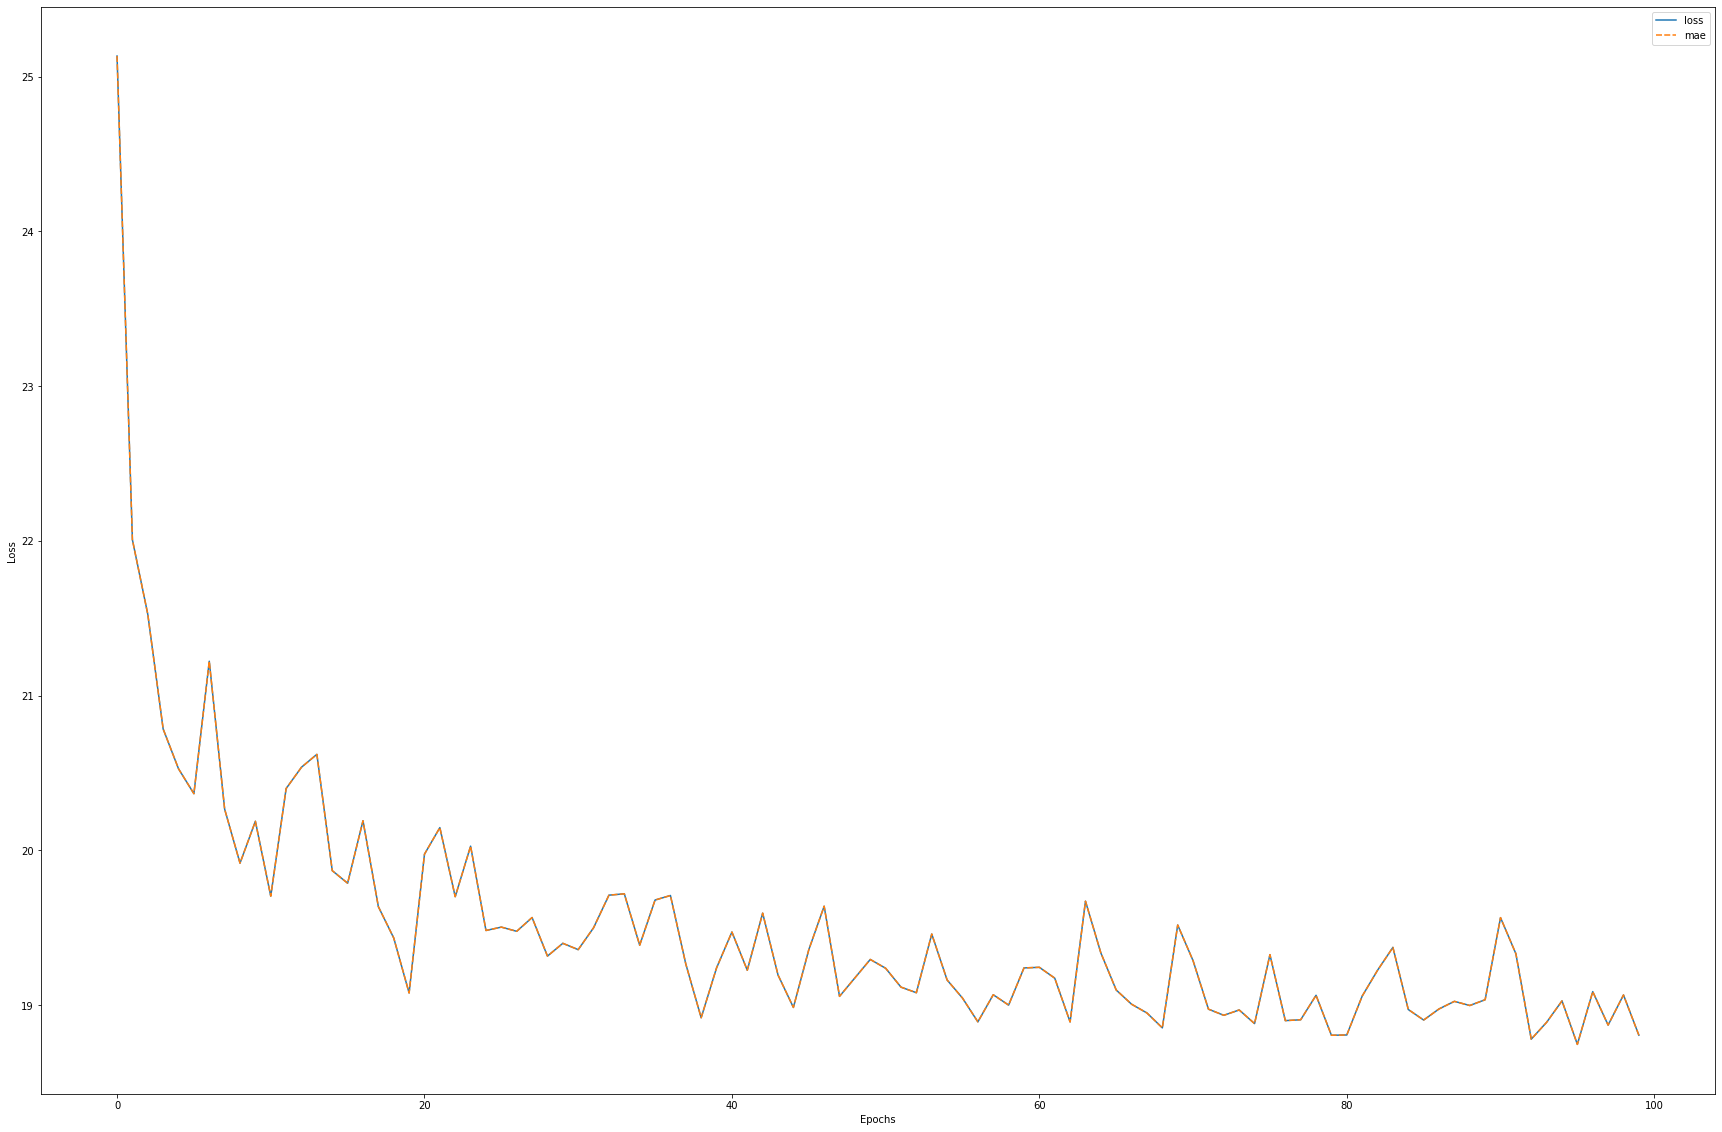

In [ ]:
plt.figure(figsize=(30,20))
plt.xlabel("Epochs")
plt.ylabel("Loss")
sns.lineplot(data=fit_data.history)


In [ ]:
#show the layers the ouput shape and the number of parameters for each layer
#Trainable Params : Model updates there as it does
# Non-Trainable Params : Not updated during training (Outside patterns from other models)
hp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10200     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 35,501
Trainable params: 35,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_predict=hp_model.predict(X_test)
results_df=pd.DataFrame()
results_df['Predictions']=list(model_predict.flatten())
results_df['Actual']=list(Y_test)
display(results_df)

,Predictions,Actual
0,148.981506,225.0
1,80.928680,90.0
2,108.399979,93.0
3,24.720951,45.0
4,28.744081,38.5
...,...,...
1516,183.420593,239.0
1517,74.038551,90.0
1518,359.331909,325.0
1519,85.286659,140.0


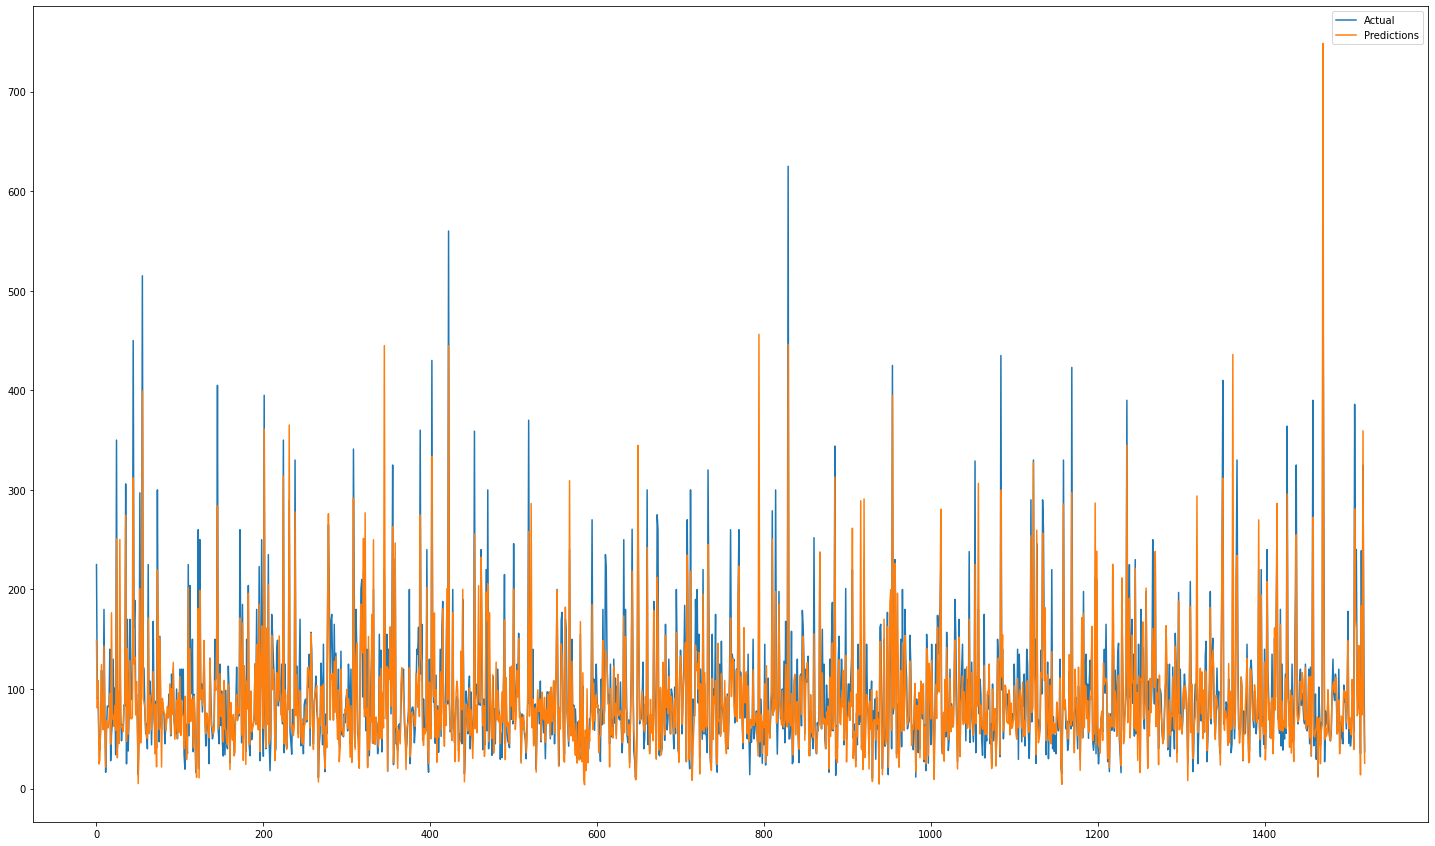

In [ ]:
results_df.plot(y=["Actual","Predictions"],kind="line",figsize=(25,15))
plt.show()

In [ ]:
model_json = hp_model.to_json()
with open("/content/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
hp_model.save_weights("/content/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:

saved_dir = "/content"
tf.saved_model.save(hp_model, saved_dir)

# converter  = tf.lite.TFLiteConverter.from_saved_model(saved_dir)
# tflite_model = converter.convert()

# with open('model.tflite','wb') as f:
#   f.write(tflite_model)



In [ ]:

converter = tf.lite.TFLiteConverter.from_saved_model(saved_dir)
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

144644

In [ ]:
import pickle
with open('real_estate_price_prediction.pickle', 'wb') as f:
    pickle.dump(hp_model, f)

In [ ]:
hp_model.predict()

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))